Forward Curve Modelling - PCA approach and Pricing with Monte Carlo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.linalg as la
from scipy.interpolate import interp1d
import os
import math
df = pd.read_excel('history_monthly_price.xls')
df

,"F(tk,tk+tau_j)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,91.66,91.85,92.15,92.43,92.68,92.88,93.08,93.23,93.29,93.26,93.11,92.92
1,81.80,81.45,81.84,82.23,82.65,83.04,83.41,83.72,84.00,84.21,84.38,84.54
2,91.44,91.83,92.10,92.39,92.71,93.03,93.25,93.38,93.43,93.42,93.37,93.28
3,96.68,96.84,97.17,97.55,97.99,98.31,98.46,98.46,98.37,98.21,97.96,97.67
4,91.87,92.42,92.74,93.10,93.46,93.74,93.93,93.98,93.88,93.65,93.34,93.03
...,...,...,...,...,...,...,...,...,...,...,...,...
102,42.15,42.42,42.64,42.84,43.02,43.15,43.27,43.35,43.40,43.43,43.45,43.48
103,47.74,47.97,48.09,48.17,48.20,48.16,48.08,47.95,47.81,47.66,47.51,47.37
104,53.24,53.31,53.20,52.98,52.70,52.38,52.05,51.72,51.39,51.07,50.76,50.44
105,61.49,61.70,61.40,60.90,60.27,59.59,58.91,58.28,57.72,57.21,56.73,56.29


In [2]:
delta_t=1.0/12.0
X = df.apply(np.log).diff()/np.sqrt(delta_t)
X.dropna(inplace=True)
X

,"F(tk,tk+tau_j)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
1,-0.394245,-0.416272,-0.411021,-0.405062,-0.396771,-0.387931,-0.379981,-0.372708,-0.363371,-0.353607,-0.341045,-0.327406
2,0.385921,0.415518,0.409141,0.403563,0.397892,0.393521,0.386302,0.378277,0.368565,0.359545,0.350705,0.340802
3,0.193032,0.184017,0.185631,0.188261,0.191873,0.191231,0.188330,0.183504,0.178482,0.173214,0.166239,0.159310
4,-0.176780,-0.161831,-0.161642,-0.161742,-0.163962,-0.164894,-0.163161,-0.161318,-0.161838,-0.164696,-0.167352,-0.168606
5,-0.120469,-0.144271,-0.135596,-0.128876,-0.123374,-0.119554,-0.115875,-0.110480,-0.102989,-0.094111,-0.084527,-0.076427
...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.057177,0.059301,0.054863,0.048860,0.042127,0.034694,0.028941,0.021643,0.016000,0.011185,0.007183,0.005581
103,0.431402,0.425932,0.416667,0.406215,0.393847,0.380519,0.365140,0.349362,0.335240,0.321961,0.309446,0.296832
104,0.377727,0.365629,0.349819,0.329706,0.309193,0.290971,0.274837,0.262183,0.250139,0.239386,0.229214,0.217530
105,0.499054,0.506313,0.496584,0.482614,0.464948,0.446741,0.428877,0.413664,0.402391,0.393285,0.385189,0.380124


In [3]:
C = X.cov()
C

,"F(tk,tk+tau_j)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
"F(tk,tk+tau_j)",0.432096,0.394213,0.282643,0.247290,0.226377,0.211990,0.199949,0.189401,0.180826,0.173166,0.166163,0.160129
Unnamed: 1,0.394213,0.362307,0.265994,0.234517,0.215599,0.202402,0.191294,0.181513,0.173477,0.166286,0.159709,0.154007
Unnamed: 2,0.282643,0.265994,0.214156,0.194172,0.181266,0.171754,0.163606,0.156294,0.150055,0.144421,0.139224,0.134639
Unnamed: 3,0.247290,0.234517,0.194172,0.177607,0.166641,0.158402,0.151282,0.144843,0.139281,0.134234,0.129558,0.125412
Unnamed: 4,0.226377,0.215599,0.181266,0.166641,0.156839,0.149395,0.142919,0.137029,0.131904,0.127236,0.122897,0.119041
Unnamed: 5,0.211990,0.202402,0.171754,0.158402,0.149395,0.142516,0.136505,0.131011,0.126208,0.121820,0.117732,0.114093
Unnamed: 6,0.199949,0.191294,0.163606,0.151282,0.142919,0.136505,0.130886,0.125733,0.121210,0.117066,0.113194,0.109746
Unnamed: 7,0.189401,0.181513,0.156294,0.144843,0.137029,0.131011,0.125733,0.120882,0.116612,0.112689,0.109014,0.105739
Unnamed: 8,0.180826,0.173477,0.150055,0.139281,0.131904,0.126208,0.121210,0.116612,0.112560,0.108828,0.105323,0.102200
Unnamed: 9,0.173166,0.166286,0.144421,0.134234,0.127236,0.121820,0.117066,0.112689,0.108828,0.105269,0.101918,0.098931


In [4]:
eigvals, eigvecs = la.eig(C)

In [5]:
Sigma_M = pd.DataFrame(eigvecs*np.sqrt(eigvals)).iloc[:,0:3]
Sigma_M

,0,1,2
0,0.616619+0.000000j,0.226973+0.000000j,0.016930+0.000000j
1,0.578514+0.000000j,0.165781+0.000000j,-0.002179+0.000000j
2,0.461786+0.000000j,-0.007195+0.000000j,-0.028225+0.000000j
3,0.418344+0.000000j,-0.045377+0.000000j,-0.022886+0.000000j
4,0.390690+0.000000j,-0.062969+0.000000j,-0.014874+0.000000j
5,0.370474+0.000000j,-0.071998+0.000000j,-0.006964+0.000000j
6,0.353134+0.000000j,-0.078428+0.000000j,-0.000209+0.000000j
7,0.337557+0.000000j,-0.083001+0.000000j,0.005611+0.000000j
8,0.324309+0.000000j,-0.085181+0.000000j,0.011053+0.000000j
9,0.312303+0.000000j,-0.086605+0.000000j,0.015193+0.000000j


In [6]:
tau=np.linspace(0,11.0/12.0,num=12)
tau_new = np.linspace(0,11.0/12.0,num=10000)

/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/anaconda3/lib/python3.6/site-packages/numpy/

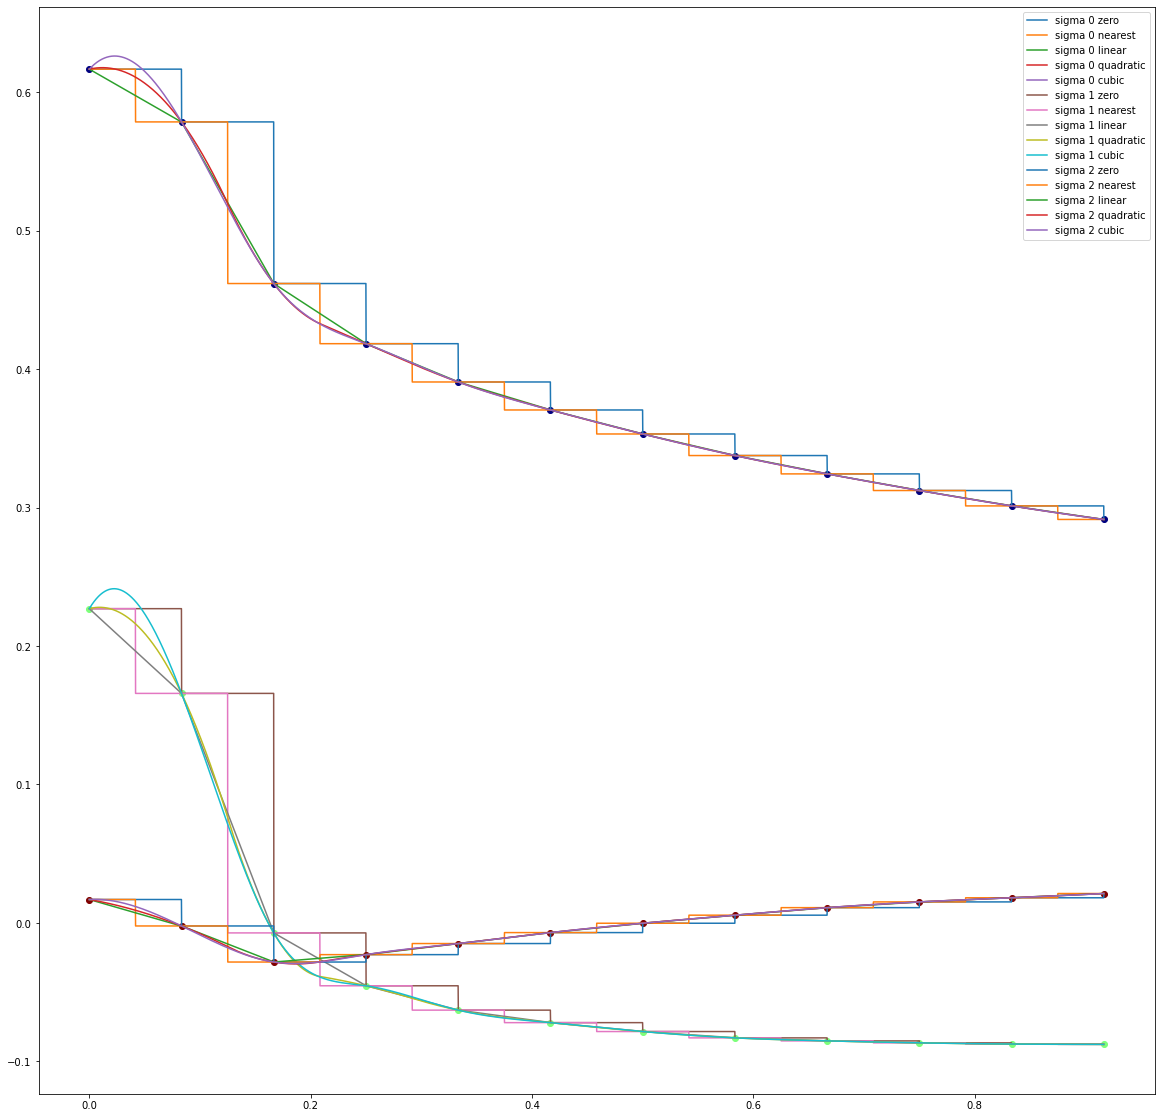

In [8]:
import matplotlib.pyplot as plt
f=[]
jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,3)))
plt.figure(figsize=(20,20))
method = ['zero','nearest','linear','quadratic','cubic']
for i in range(0,len(Sigma_M.T)):
    expol_1=(Sigma_M[i][0],Sigma_M[i][11])
    plt.plot(tau,Sigma_M[i],'ro',color=next(colors))
    for kind in ['zero','nearest','linear','quadratic','cubic']:
        g=interp1d(tau,Sigma_M[i],kind=kind,bounds_error=False,fill_value=expol_1)
        Sigma_new=g(tau_new)
        plt.plot(tau_new,Sigma_new,label ="sigma "+str(int(i))+' '+ kind)
        f.append(g)
plt.legend(loc="upper right")

Monte Carlo Simulation

In [14]:
M=1000#path
K=56#strike
r=0.0166#interest rate
dt=1.0/365
df=np.exp(-r*dt)#discount factor
s_0=62
T=30 #days


In [15]:
interpolation_method_linear = [f[2],f[7],f[12]]
interpolation_method_piecewiseconst = [f[0],f[5],f[10]]
interpolation_method_cubit = [f[4],f[9],f[14]]


In [16]:
import random
random.seed(10)
s_t=np.zeros((M,T+1)) 
y_t=np.zeros((M,T))
K_t=K*np.ones((1,M))
s_2_t=np.zeros((M,T+1))

s_t=s_0*np.ones((M,T+1))
s_2_t=s_0*np.ones((M,T+1))
for k in range(1,T+1):
    for i in range(M):
        tau_j=(T-k+1)*dt
        Z_i = np.random.normal(0, 1.0, 3)
        sigma_square=interpolation_method_linear[0](tau_j)*interpolation_method_linear[0](tau_j)+interpolation_method_linear[1](tau_j)*interpolation_method_linear[1](tau_j)+interpolation_method_linear[2](tau_j)*interpolation_method_linear[2](tau_j)
        sigma_sum=interpolation_method_linear[0](tau_j)*np.sqrt(dt)*Z_i[0]+interpolation_method_linear[1](tau_j)*np.sqrt(dt)*Z_i[1]+interpolation_method_linear[2](tau_j)*np.sqrt(dt)*Z_i[2]
        s_t[i,k]=s_t[i,k-1]*np.exp((-0.5*sigma_square)*dt+sigma_sum)
        s_2_t[i,k]=s_2_t[i,k-1]*np.exp((-0.5*sigma_square)*dt-sigma_sum)


a_t=np.mean(s_t,1)
a_2_t=np.mean(s_2_t,1)

Z=np.zeros((1,M))
Z_2=np.zeros((1,M))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


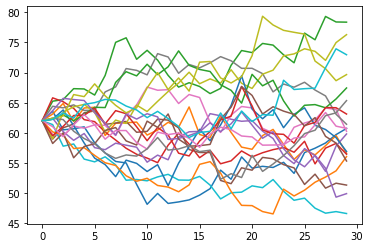

In [17]:
t=range(0,T)
for j in range(20):
    plt.plot(t,s_t[j,t])

In [18]:
price_as=np.exp(-r*T/365)*np.maximum(a_t-K_t,Z)
price_a=np.mean(price_as)
price_as_2=np.exp(-r*T/365)*np.maximum(a_2_t-K_t,Z)
price_a_2=np.mean(price_as_2)
price_a_var_reduction=(price_a+price_a_2)/2
print(price_a)
print(price_a_2)
print(price_a_var_reduction)

6.484060563291123
6.505898380873076
6.4949794720820995


In [15]:
import random
random.seed(10)
s_t=np.zeros((M,T+1)) 
y_t=np.zeros((M,T))
K_t=K*np.ones((1,M))
s_2_t=np.zeros((M,T+1))

s_t=s_0*np.ones((M,T+1))
s_2_t=s_0*np.ones((M,T+1))
for k in range(1,T+1):
    for i in range(M):
        tau_j=(T-k+1)*dt
        Z_i = np.random.normal(0, 1.0, 3)
        sigma_square=interpolation_method_cubit[0](tau_j)*interpolation_method_cubit[0](tau_j)+interpolation_method_cubit[1](tau_j)*interpolation_method_cubit[1](tau_j)+interpolation_method_cubit[2](tau_j)*interpolation_method_cubit[2](tau_j)
        sigma_sum=interpolation_method_cubit[0](tau_j)*np.sqrt(dt)*Z_i[0]+interpolation_method_cubit[1](tau_j)*np.sqrt(dt)*Z_i[1]+interpolation_method_cubit[2](tau_j)*np.sqrt(dt)*Z_i[2]
        s_t[i,k]=s_t[i,k-1]*np.exp((-0.5*sigma_square)*dt+sigma_sum)
        s_2_t[i,k]=s_2_t[i,k-1]*np.exp((-0.5*sigma_square)*dt-sigma_sum)


a_t=np.mean(s_t,1)
a_2_t=np.mean(s_2_t,1)

Z=np.zeros((1,M))
Z_2=np.zeros((1,M))

<ipython-input-15-d602115899aa>:16: ComplexWarning: Casting complex values to real discards the imaginary part
  s_t[i,k]=s_t[i,k-1]*np.exp((-0.5*sigma_square)*dt+sigma_sum)
<ipython-input-15-d602115899aa>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  s_2_t[i,k]=s_2_t[i,k-1]*np.exp((-0.5*sigma_square)*dt-sigma_sum)


In [16]:
price_as=np.exp(-r*T/365)*np.maximum(a_t-K_t,Z)
price_a=np.mean(price_as)
price_as_2=np.exp(-r*T/365)*np.maximum(a_2_t-K_t,Z)
price_a_2=np.mean(price_as_2)
price_a_var_reduction=(price_a+price_a_2)/2
print(price_a)
print(price_a_2)
print(price_a_var_reduction)

5.991942126242923
6.11883947652236
6.055390801382641
